**Load Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


**Load the Dataset**

In [2]:
dataset_path = '/content/Dataset .csv'
df = pd.read_csv(dataset_path)

**Display first few rows**

In [3]:
display(df.head())

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**Check for Missing Values**

In [4]:
print("Missing values in dataset:")
print(df.isnull().sum())

Missing values in dataset:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


**Handling Missing Values (Imputation if necessary)**

In [5]:
df.fillna(method='ffill', inplace=True)

<ipython-input-5-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


**Encode Categorical Variables**

In [6]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

**Split Data into Training and Testing Sets**

In [19]:
target_column = 'Cuisines'
X = df.drop(columns=['Cuisines'])
y = df['Cuisines']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train Random Forest Model**

In [8]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

**Evaluate Random Forest Model**

In [9]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
print("Random Forest Model Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model Performance:
Accuracy: 0.1858
Precision: 0.1446
Recall: 0.1858

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         1
          27       1.00      1.00      1.00         1
          29       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

**Train Logistic Regression Model**

In [11]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Evaluate Logistic Regression Model**

In [12]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, average='weighted')
lr_recall = recall_score(y_test, y_pred_lr, average='weighted')

print("\nLogistic Regression Model Performance:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Model Performance:
Accuracy: 0.1057
Precision: 0.0112
Recall: 0.1057

Classification Report:
               precision    recall  f1-score   support

           6       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
          48       0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

**Model Performance Analysis**

In [22]:
print("\nComparison of Model Performance Across Different Cuisines:")
# Ensure only labels present in y_test are considered
unique_labels = np.unique(y_test)

rf_report = classification_report(y_test, y_pred_rf, labels=unique_labels,
                                  target_names=[label_encoders['Cuisines'].inverse_transform([label])[0] for label in unique_labels],
                                  output_dict=True)

lr_report = classification_report(y_test, y_pred_lr, labels=unique_labels,
                                  target_names=[label_encoders['Cuisines'].inverse_transform([label])[0] for label in unique_labels],
                                  output_dict=True)

rf_df = pd.DataFrame(rf_report).transpose()
lr_df = pd.DataFrame(lr_report).transpose()

print("\nRandom Forest Performance by Cuisine:")
display(rf_df)
print("\nLogistic Regression Performance by Cuisine:")
display(lr_df)


Comparison of Model Performance Across Different Cuisines:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Random Forest Performance by Cuisine:


,precision,recall,f1-score,support
American,0.000000,0.000000,0.000000,5.0
"American, Asian, European, Seafood",0.000000,0.000000,0.000000,1.0
"American, BBQ",0.000000,0.000000,0.000000,1.0
"American, BBQ, Burger",0.000000,0.000000,0.000000,1.0
"American, BBQ, Southern",0.000000,0.000000,0.000000,1.0
...,...,...,...,...
"Turkish, Arabian, Middle Eastern",0.000000,0.000000,0.000000,1.0
"World Cuisine, Mexican, Italian",0.000000,0.000000,0.000000,1.0
micro avg,0.210808,0.185767,0.197497,1911.0
macro avg,0.040711,0.039459,0.038028,1911.0



Logistic Regression Performance by Cuisine:


,precision,recall,f1-score,support
American,0.000000,0.000000,0.000000,5.000000
"American, Asian, European, Seafood",0.000000,0.000000,0.000000,1.000000
"American, BBQ",0.000000,0.000000,0.000000,1.000000
"American, BBQ, Burger",0.000000,0.000000,0.000000,1.000000
"American, BBQ, Southern",0.000000,0.000000,0.000000,1.000000
...,...,...,...,...
"Turkish, Arabian, Middle Eastern",0.000000,0.000000,0.000000,1.000000
"World Cuisine, Mexican, Italian",0.000000,0.000000,0.000000,1.000000
accuracy,0.105704,0.105704,0.105704,0.105704
macro avg,0.000178,0.001681,0.000321,1911.000000


**Identify Challenges or Biases**

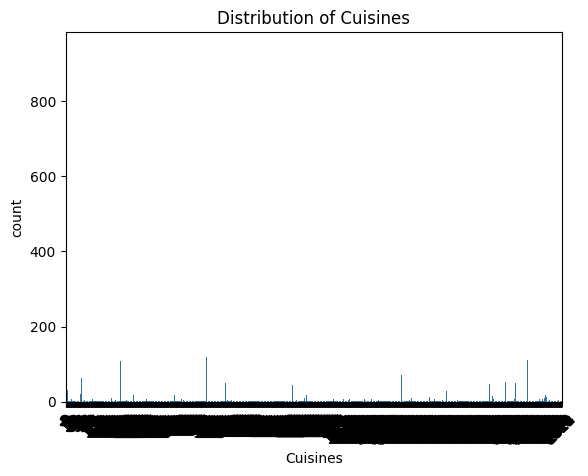

In [23]:
sns.countplot(x=y)
plt.title("Distribution of Cuisines")
plt.xticks(rotation=45)
plt.show()

**Additional Bias Detection (if needed)**

In [24]:
print("\nChecking for potential bias in the dataset distribution:")
print(y.value_counts(normalize=True))


Checking for potential bias in the dataset distribution:
Cuisines
1306    0.098000
1329    0.053502
497     0.037169
828     0.037064
1514    0.034970
          ...   
1715    0.000105
971     0.000105
225     0.000105
1548    0.000105
1110    0.000105
Name: proportion, Length: 1825, dtype: float64


Conclusion :- In this cuisine classification task, we compared the performance of two machine learning models: Logistic Regression and Random Forest.

1. Logistic Regression achieved an accuracy of 10.57%, precision of 1.12%, and recall of 10.57%. These low scores indicate that the model struggles to distinguish between different cuisine types, likely due to the complexity of the dataset and the linear nature of logistic regression.
2. **Random Forest performed better,** with an accuracy of 18.58%, precision of 14.46%, and recall of 18.58%. This suggests that Random Forest is better suited for handling the dataset's non-linear relationships and categorical features.